In [4]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("heart.csv")

In [10]:
new_columns = ["age","sex","cp","trtbps","chol","fbs","rest_ecg","thalach","exang","oldpeak","slope","ca","thal","target"]

In [13]:
df.columns = new_columns

In [16]:
numeric_var = ["age","trtbps","chol","thalach","oldpeak"]
categoric_var = ["sex","cp","fbs","rest_ecg","exang","slope","ca","thal","target"]

In [18]:
df.drop(["chol","fbs","rest_ecg"],axis = 1, inplace =True)

In [20]:
df.head()

,age,sex,cp,trtbps,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,150,0,2.3,0,0,1,1
1,37,1,2,130,187,0,3.5,0,0,2,1
2,41,0,1,130,172,0,1.4,2,0,2,1
3,56,1,1,120,178,0,0.8,2,0,2,1
4,57,0,0,120,163,1,0.6,2,0,2,1


#### Visualizing outliers

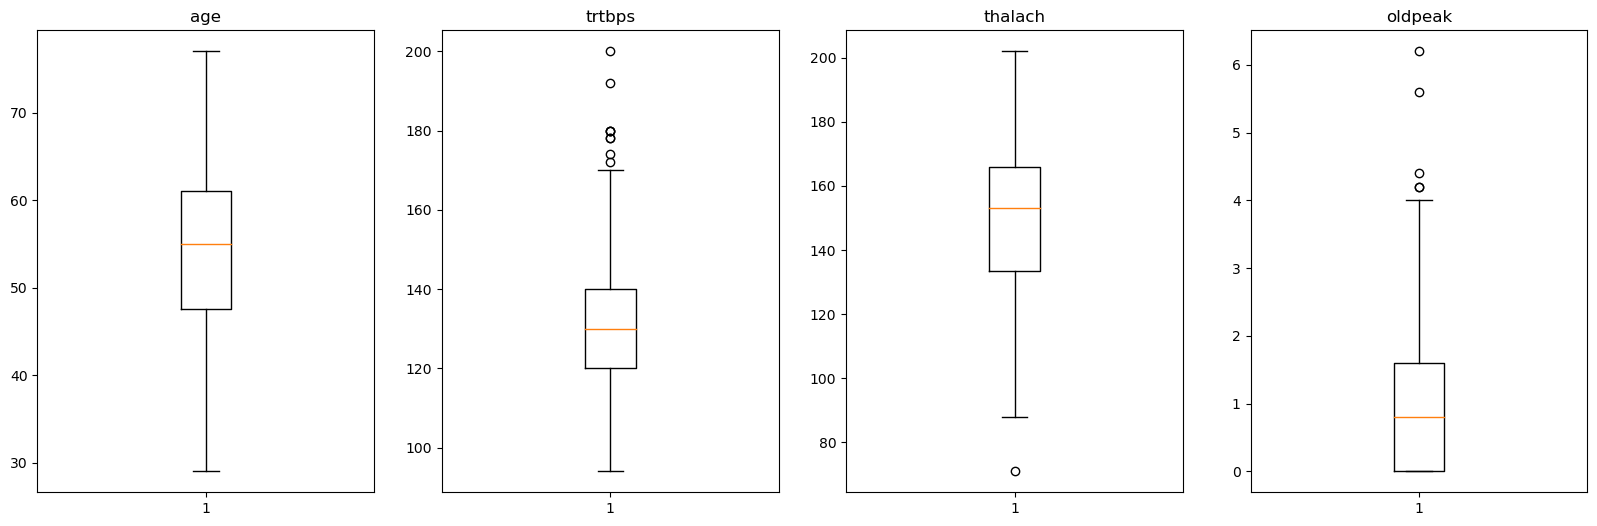

In [23]:
fig , (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(20,6))

ax1.boxplot(df["age"])
ax1.set_title("age")

ax2.boxplot(df["trtbps"])
ax2.set_title("trtbps")

ax3.boxplot(df["thalach"])
ax3.set_title("thalach")

ax4.boxplot(df["oldpeak"])
ax4.set_title("oldpeak")

plt.show()

Age Variable:
We can see the exact image we want in this variable. There are no outliers. And the box stands at the midpoint of the whiskers.

Trtbps Variable:
There are more outliers in the "trtbps" variable than the others.
In terms of distribution, an image is very prone to normal distribution. The box appears near the middle of the two whiskers.

Oldpeak Variable:
There is no such thing as a lower whisker in the Oldpeak variable. The bottom of the box is at the level of the lower mustache. It means that the values are concentrated on the left side. So we can say that there is a queue to the right. So there is a right skew.
If we examine the mustache at the top, we can see the outliers above the mustache.

#### Dealing with Outliers

In [30]:
from scipy import stats
from scipy.stats import zscore
from scipy.stats.mstats import winsorize

In [34]:
z_scores_trtbps = zscore(df["trtbps"])
for threshold in range(1,4):
    print("Threshold Value: {}".format(threshold))
    print("Number of Outliers: {}".format(len(np.where(z_scores_trtbps > threshold)[0])))
    print('-----------------------------------')

Threshold Value: 1
Number of Outliers: 51
-----------------------------------
Threshold Value: 2
Number of Outliers: 13
-----------------------------------
Threshold Value: 3
Number of Outliers: 2
-----------------------------------


In [36]:
df[z_scores_trtbps > 2][["trtbps"]] #2 threshold alaninin disinda olan outlierslar

,trtbps
8,172
101,178
110,180
152,170
195,170
203,180
223,200
228,170
241,174
248,192


In [38]:
df[z_scores_trtbps > 2].trtbps.min()

170

In [40]:
df[df["trtbps"] < 170].trtbps.max()

165

In [44]:
winsorize_percentile_trtbps = (stats.percentileofscore(df["trtbps"],165)) / 100
print(winsorize_percentile_trtbps)

0.957095709570957


In [56]:
1 - winsorize_percentile_trtbps #Burada 1’den çıkardığımızda, dizide 165’in üzerindeki gözlemlerin oranını elde ederiz

0.04290429042904298

In [48]:
trtbps_winsorize = winsorize(df.trtbps,(0,(1 - winsorize_percentile_trtbps)))

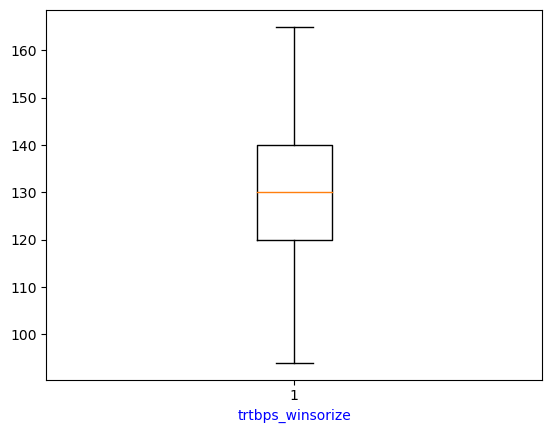

In [50]:
plt.boxplot(trtbps_winsorize)
plt.xlabel("trtbps_winsorize",color="b")
plt.show()

In [52]:
df["trtbps_winsorize"] = trtbps_winsorize

In [54]:
df.head()

,age,sex,cp,trtbps,thalach,exang,oldpeak,slope,ca,thal,target,trtbps_winsorize
0,63,1,3,145,150,0,2.3,0,0,1,1,145
1,37,1,2,130,187,0,3.5,0,0,2,1,130
2,41,0,1,130,172,0,1.4,2,0,2,1,130
3,56,1,1,120,178,0,0.8,2,0,2,1,120
4,57,0,0,120,163,1,0.6,2,0,2,1,120


#### Interquartile Range Method

In [59]:
def iqr(df,var):
    q1 = np.quantile(df[var],0.25)
    q3 = np.quantile(df[var],0.75)
    diff = q3 - q1
    lower_v = q1 - (1.5 * diff)
    upper_v = q3 + (1.5 * diff)

    return df[(df[var]<lower_v) | (df[var] > upper_v)]

In [61]:
thalach_out = iqr(df,"thalach")

In [63]:
thalach_out

,age,sex,cp,trtbps,thalach,exang,oldpeak,slope,ca,thal,target,trtbps_winsorize
272,67,1,0,120,71,0,1.0,1,0,2,0,120
